In [202]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [203]:
import scipy
from scipy.stats import norm

In [204]:
stock='AXISBANK.NS'
data = yf.download(stock,'2005-01-01','2023-05-05')

[*********************100%***********************]  1 of 1 completed


In [205]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,37.000000,38.200001,37.000000,38.040001,32.853142,1421010
2005-01-04,38.220001,38.400002,37.400002,37.939999,32.766785,1115825
2005-01-05,37.990002,37.990002,35.509998,36.849998,31.825407,1163085
2005-01-06,36.820000,38.000000,35.400002,37.029999,31.980862,1192610
2005-01-07,36.130001,38.380001,36.130001,38.020000,32.835861,1530260
...,...,...,...,...,...,...
2023-04-27,888.000000,890.000000,877.500000,881.400024,879.590515,15992383
2023-04-28,885.099976,890.049988,853.650024,860.000000,858.234375,23004117
2023-05-02,870.000000,876.400024,864.250000,870.650024,868.862549,12947953


In [206]:
# data = data[:4000]

In [207]:
returns = np.diff(data['Adj Close'])
returns=-returns

In [208]:
data.shape,returns.shape

((4525, 6), (4524,))

In [209]:
returns.shape

(4524,)

In [210]:
np.sum(returns)

-831.3190383911133

In [211]:
data['Adj Close']

Date
2005-01-03     32.853142
2005-01-04     32.766785
2005-01-05     31.825407
2005-01-06     31.980862
2005-01-07     32.835861
                 ...    
2023-04-27    879.590515
2023-04-28    858.234375
2023-05-02    868.862549
2023-05-03    858.084717
2023-05-04    864.172180
Name: Adj Close, Length: 4525, dtype: float64

In [212]:
mean = np.mean(returns)
std_dev = np.std(returns)
mean,std_dev

(-0.18375752395913203, 8.991497020143704)

In [213]:
np.array(returns)

array([  0.08635712,   0.94137764,  -0.15545464, ..., -10.62817383,
        10.77783203,  -6.08746338])

In [214]:
np.array(data['Adj Close'])

array([ 32.85314178,  32.76678467,  31.82540703, ..., 868.86254883,
       858.0847168 , 864.17218018])

In [215]:
np.sort(np.array(returns))

array([-77.87487793, -74.39697266, -63.17367554, ...,  59.98504639,
        75.82830811, 119.07342529])

In [216]:
import torch
import torch.nn as nn


In [217]:
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super(QuantileLoss, self).__init__()
        self.quantile = quantile

    def forward(self, predictions, targets):
        errors = targets - predictions
        quantile_loss = torch.max((self.quantile - 1) * errors, self.quantile * errors)
        return quantile_loss.mean()

In [218]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(input_size, hidden_size,dtype=torch.float64)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size,dtype=torch.float64)

    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [219]:
network = NeuralNetwork(1,5,1)
quantile_loss = QuantileLoss(0.1)

In [220]:
optimizer = torch.optim.SGD(network.parameters(),lr=0.001)
input = np.array(data['Adj Close'])
input=input[0:-1]
input=torch.from_numpy(input)
input= torch.unsqueeze(input, dim=1)
returns=torch.from_numpy(returns)
returns=torch.unsqueeze(returns,dim=1)

In [221]:
for epoch in range(100000):
    outputs = network(input)
    loss = quantile_loss(outputs, returns)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 1000== 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item()}")

Epoch: 1000, Loss: 1.492762538175066
Epoch: 2000, Loss: 1.491970528898257
Epoch: 3000, Loss: 1.4912095840562707
Epoch: 4000, Loss: 1.4904853022036153
Epoch: 5000, Loss: 1.4897710423220787
Epoch: 6000, Loss: 1.4890661097238
Epoch: 7000, Loss: 1.4884130268238756
Epoch: 8000, Loss: 1.4877910900463087
Epoch: 9000, Loss: 1.487190331405741
Epoch: 10000, Loss: 1.4865918916089444
Epoch: 11000, Loss: 1.4860049599207117
Epoch: 12000, Loss: 1.4854502436063646
Epoch: 13000, Loss: 1.484920897332311
Epoch: 14000, Loss: 1.4844142737892607
Epoch: 15000, Loss: 1.4839229546983987
Epoch: 16000, Loss: 1.4834479578114999
Epoch: 17000, Loss: 1.4829869479246642
Epoch: 18000, Loss: 1.4825555967787178
Epoch: 19000, Loss: 1.4821373507006599
Epoch: 20000, Loss: 1.4817257064141816
Epoch: 21000, Loss: 1.4813190350108314
Epoch: 22000, Loss: 1.4809187379182884
Epoch: 23000, Loss: 1.480527065254107
Epoch: 24000, Loss: 1.4801395772518455
Epoch: 25000, Loss: 1.4797614272049222
Epoch: 26000, Loss: 1.4793875491274866
Epo

In [222]:
outputs=network(input)
ans=outputs.detach().numpy()
ans.shape
x=np.arange(ans.shape[0])
x

array([   0,    1,    2, ..., 4521, 4522, 4523])

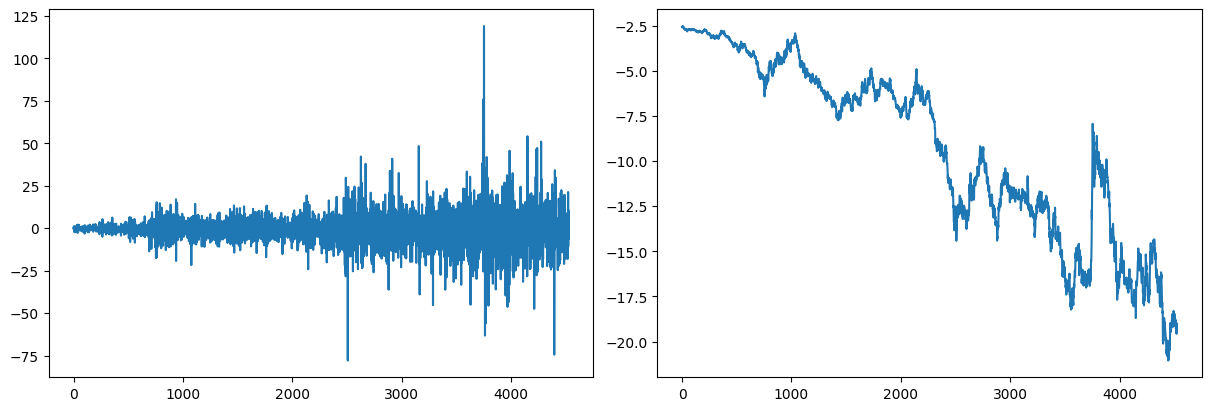

In [223]:
fig,(ax1,ax2)=plt.subplots(1,2,constrained_layout=True,figsize=(12,4))
ax1.plot(returns)
ax2.plot(ans)